## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from pandas.api.types import CategoricalDtype
from google.colab import drive



In [4]:
# Step 1: Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Loading

In [5]:
train_data_path = '/content/gdrive/My Drive/project/train.csv'
test_data_path = '/content/gdrive/My Drive/project/test.csv'


df=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

print(df.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


# Data Analysis

In [6]:
pd.set_option('display.max_columns',None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### data integration

In [9]:
#df=pd.concat((df_train,df_test))
temp_df=df
print(df.shape)

(1460, 81)


In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Exploratory data analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:

int_feature=df.select_dtypes(include=['int64']).columns

In [15]:
float_feature=df.select_dtypes(include=['float64']).columns

In [16]:
cat_feature=df.select_dtypes(include=['object']).columns

### visualing missing value

<Axes: >

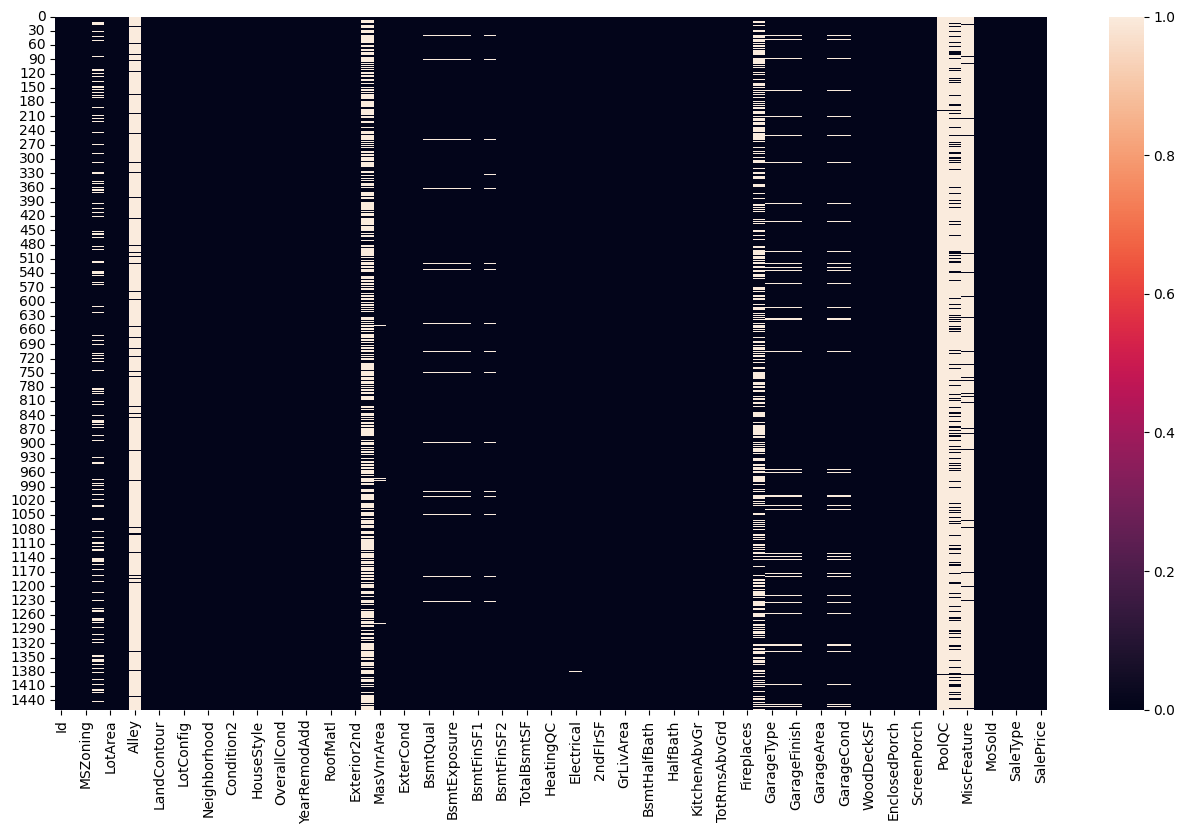

In [17]:

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [18]:

# set index as is column
df=df.set_index("Id")

### get the null value percentage for every feature

In [19]:


null_count=df.isnull().sum()
null_count

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [20]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

,0
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
LotConfig,0.000000


## drop column/features

In [21]:
""" as per domain knowldge we will not drop this featurre rather we add some constant value 'NA'  """
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc

,0
Alley,93.767123
MasVnrType,59.726027
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [22]:
""" as per domain knowldge we will not drop this featurre rather we add some constant value 'NA'  """
miss_value_20_50_perc=null_percent[(null_percent>20)& (null_percent<51)]
miss_value_20_50_perc

,0
FireplaceQu,47.260274


In [23]:
miss_value_5_20_perc=null_percent[(null_percent>5)& (null_percent<21)]
miss_value_5_20_perc

,0
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945
GarageCond,5.547945


<Axes: ylabel='Id'>

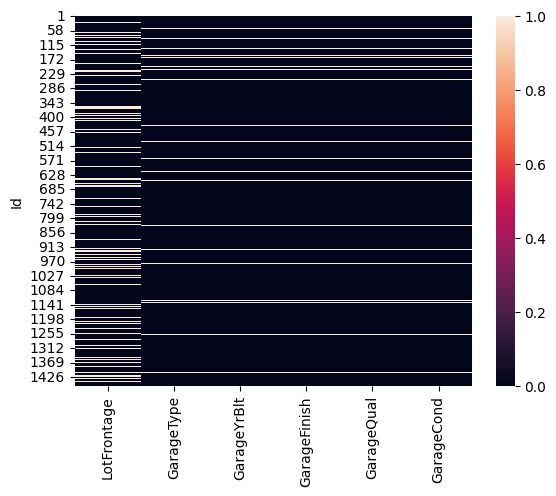

In [24]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [25]:
## as per observation we will not drop any feature from data set

## missing value imputation


In [26]:
missing_value_feat=null_percent[null_percent>0]
print("Total missing value feature=",len(missing_value_feat))
missing_value_feat

Total missing value feature= 19


,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [27]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_feature)]
print("total number of categorical missing feature",len(cat_na_feat))
cat_na_feat

total number of categorical missing feature 16


,0
Alley,93.767123
MasVnrType,59.726027
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
FireplaceQu,47.260274
GarageType,5.547945


In [28]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_feature)]
print("total number of int missing feature",len(int_na_feat))
int_na_feat

total number of int missing feature 0


,0


In [29]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_feature)]
print("total number of float missing feature",len(float_na_feat))
float_na_feat

total number of float missing feature 3


,0
LotFrontage,17.739726
MasVnrArea,0.547945
GarageYrBlt,5.547945


In [30]:
## funtion to visualize data feature before and after imputation of missing value
def plot_data(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(x=feature, data=df)
    plt.title("Before Imputation")
    plt.subplot(122)
    sns.countplot(x=feature, data=df_new)
    plt.title("After Imputation")
    plt.show()


<Axes: xlabel='MSZoning', ylabel='count'>

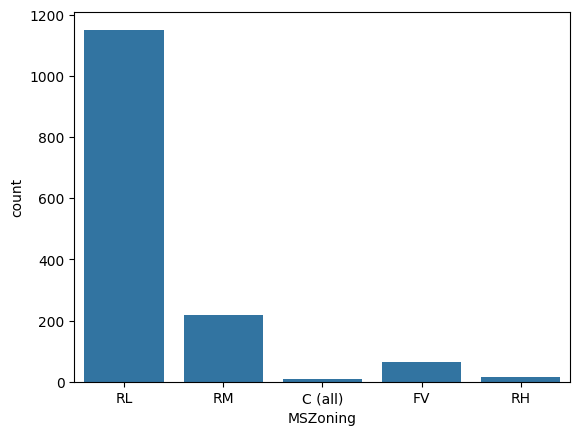

In [31]:
### handling MSZoning=0.137033

df["MSZoning"].value_counts()

# count plot in graph form
sns.countplot(x=df["MSZoning"])

In [32]:
## backing up origianl data frame
df_mvi=df.copy()

In [33]:
# as we can see here RL is the mode for this feature
mszoning_mode=df["MSZoning"].mode()[0]
mszoning_mode
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
# now chceck do we have any missinf vLUE
df_mvi["MSZoning"].isnull().sum()

<ipython-input-33-10ff7b70d898>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)


np.int64(0)

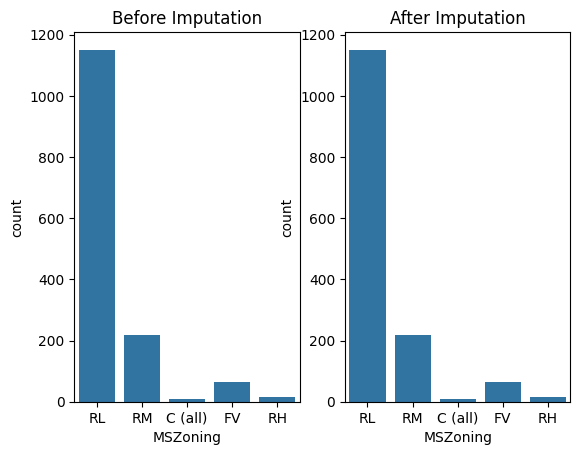

In [34]:
#compare before and after imputation
feature="MSZoning"
plot_data(df,df_mvi,feature)

<ipython-input-35-5c61563276f1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True) # replace missing value with 'NA'


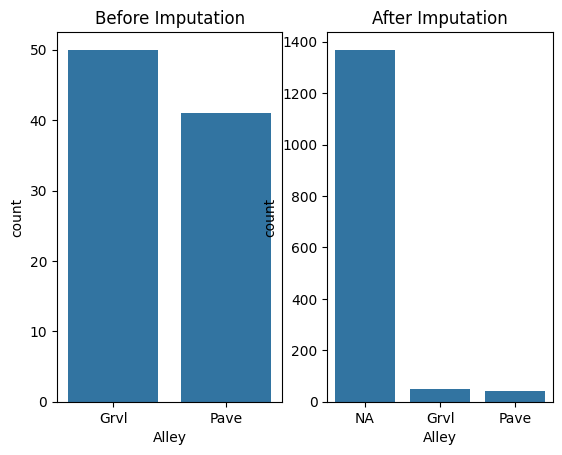

In [35]:
## handleing alley = 93.216855

df_mvi["Alley"].value_counts()
alley_cont="NA"
df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True) # replace missing value with 'NA'
df_mvi["Alley"].isnull().sum()

# compare before and after imputation
plot_data(df,df_mvi,"Alley")

In [36]:
#LotFrontage=16.649538
def boxHistPlot(df,feature, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(x=feature, data=df)
    plt.subplot(122)
    sns.histplot(x=feature,data=df,stat="density", kde=True)
    plt.show()



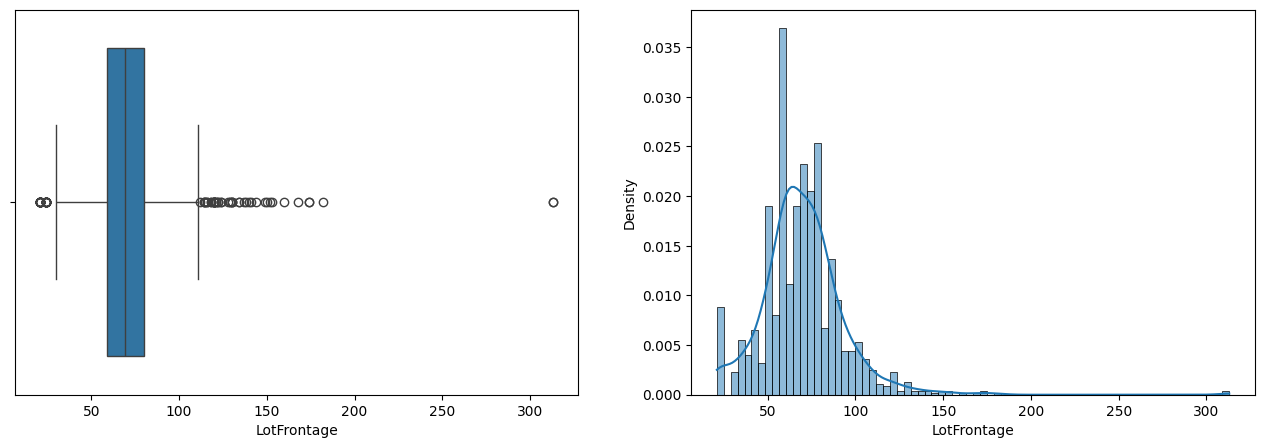

In [37]:
boxHistPlot(df,"LotFrontage")

In [38]:
lotfrontage_mean=df["LotFrontage"].mean()
# lotfrontage_mean
df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

<ipython-input-38-27fba4b9e2c8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace=True)


np.int64(0)

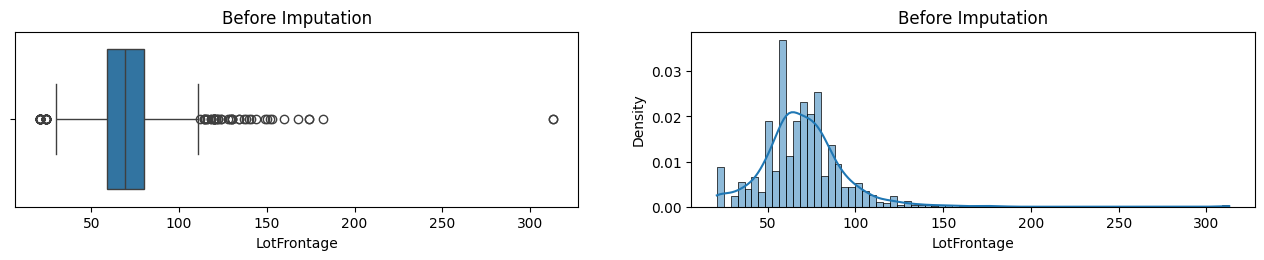

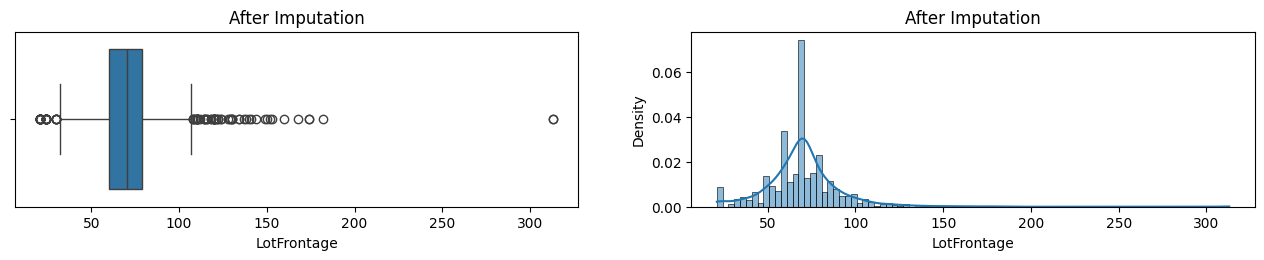

In [39]:
# compare old and new box hist plot after imputation
def oldNewBoxHistPlot(df,df_new,feature, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(x=feature, data=df)
    plt.title("Before Imputation")
    plt.subplot(222)
    sns.histplot(x=feature,data=df,stat="density", kde=True)
    plt.title("Before Imputation")
    plt.figure(figsize=figsize)
    plt.subplot(223)
    sns.boxplot(x=feature, data=df_new)
    plt.title("After Imputation")
    plt.subplot(224)
    sns.histplot(x=feature,data=df_new,stat="density", kde=True)
    plt.title("After Imputation")
    plt.show()

oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

In [40]:
## handling utility
df["Utilities"].value_counts()
utility_const=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utility_const,inplace=True)
df_mvi["Utilities"].isnull().sum()

<ipython-input-40-b2cab233e170>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,utility_const,inplace=True)


np.int64(0)

In [41]:
# Exterior1st      0.034258
# Exterior2nd      0.034258
# both are object type

print(df["Exterior1st"].value_counts())
print("----")
print(df["Exterior2nd"].value_counts())

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
----
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


In [42]:
exterior_1_const=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,exterior_1_const,inplace=True)
df_mvi["Exterior1st"].isnull().sum()

<ipython-input-42-065f893a4e2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,exterior_1_const,inplace=True)


np.int64(0)

In [43]:
exterior_2_const=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan,exterior_2_const,inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

<ipython-input-43-b3fb6f4ab079>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan,exterior_2_const,inplace=True)


np.int64(0)

<Axes: ylabel='Id'>

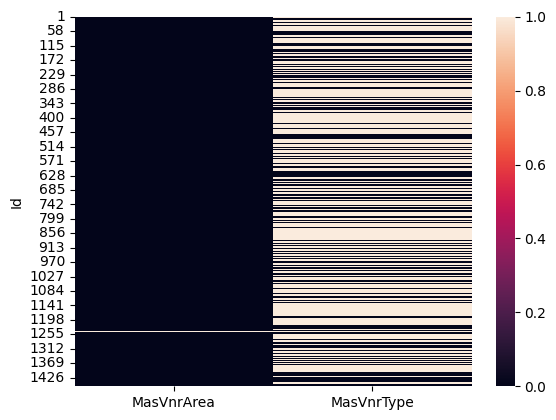

In [44]:
# MasVnrType       0.822199
# MasVnrArea       0.787941

sns.heatmap(df[["MasVnrArea", "MasVnrType"]].isnull())


In [45]:
mas_vnr_type_const=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,mas_vnr_type_const,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

<ipython-input-45-6a3df8617255>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,mas_vnr_type_const,inplace=True)


np.int64(0)

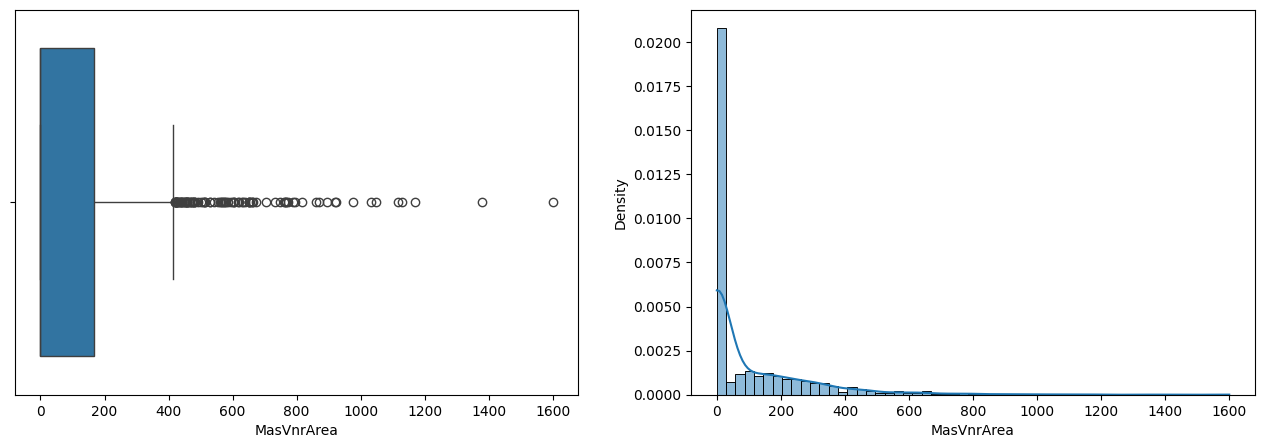

In [46]:
boxHistPlot(df,"MasVnrArea")

In [47]:
mas_vnr_area_const=0# as we can see the mode is 0 in above plots
df_mvi["MasVnrArea"].replace(np.nan,mas_vnr_area_const,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

<ipython-input-47-1aee08f63929>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan,mas_vnr_area_const,inplace=True)


np.int64(0)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
----
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
----
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
----
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
----
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
----


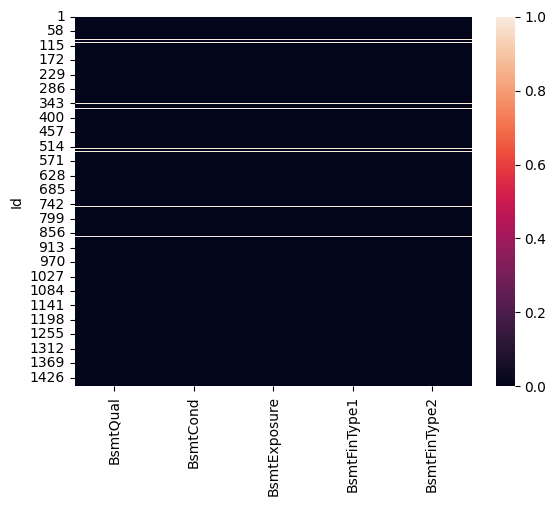

In [48]:
### handleing basement
## categarical
# BsmtQual         2.774923
# BsmtCond         2.809181
# BsmtExposure     2.809181
# BsmtFinType1     2.706406
# BsmtFinType2     2.740665

## numerical
# BsmtFinSF1       0.034258
# BsmtFinSF2       0.034258
# BsmtUnfSF        0.034258
# TotalBsmtSF      0.034258
# BsmtFullBath     0.068517
# BsmtHalfBath     0.068517


cat_bsmt_feat=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
num_bsmt_feat=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

sns.heatmap(df[cat_bsmt_feat].isnull()) # check missing values in categorical features
for feat in cat_bsmt_feat:
    print(df[feat].value_counts())
    print("----")

In [49]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

<ipython-input-49-d9c6f0dbad0e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)


<Axes: ylabel='Id'>

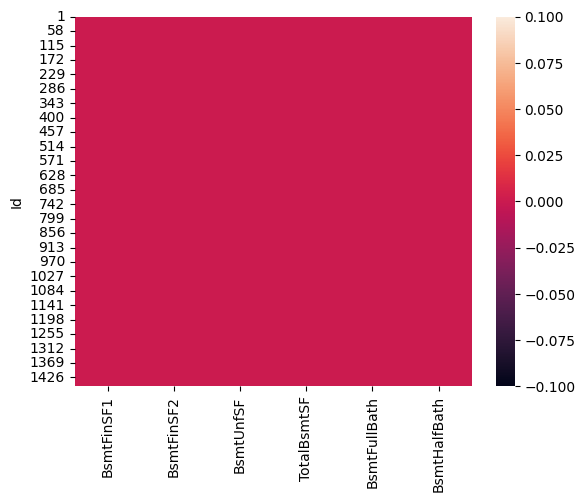

In [50]:
sns.heatmap(df[num_bsmt_feat].isnull()) # check missing values in numerical features

In [51]:
# analysing basement feature
df_bsmt=df[cat_bsmt_feat+num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
40,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
91,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
103,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
183,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
260,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
333,Gd,TA,No,GLQ,NaN,1124,479,1603,3206,1,0
343,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [52]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

<ipython-input-52-bf533f8c7e87>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)


In [53]:
# Electrical       0.034258 -- KitchenQual      0.034258
df["Electrical"].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [54]:
df["KitchenQual"].value_counts()

,count
KitchenQual,
TA,735
Gd,586
Ex,100
Fa,39


In [55]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1


In [56]:
electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,electrical_mode,inplace=True)
df_mvi["Electrical"].isnull().sum()

<ipython-input-56-1335b358e8f6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan,electrical_mode,inplace=True)


np.int64(0)

In [57]:
kitchenqual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode,inplace=True)
df_mvi["KitchenQual"].isnull().sum()

<ipython-input-57-4b83f3743a24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode,inplace=True)


np.int64(0)

In [58]:
# Functional       0.068517 - mode
# FireplaceQu     48.646797 - NA
# PoolQC          99.657417 - NA
# Fence           80.438506 - NA
# MiscFeature     96.402878 - NA
# SaleType         0.034258 - mode

In [59]:
print(df["Functional"].value_counts())
print("----")
print(df["FireplaceQu"].value_counts())
print("----")
print(df["PoolQC"].value_counts())
print("----")
print(df["Fence"].value_counts())
print("----")
print(df["MiscFeature"].value_counts())
print("----")
print(df["SaleType"].value_counts())
print("----")

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64
----
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
----
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
----
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
----
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64
----
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64
----


In [60]:
functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)
df_mvi["Functional"].isnull().sum()

<ipython-input-60-c5f9ef55d206>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,functional_mode,inplace=True)


np.int64(0)

In [61]:
saletype_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan,saletype_mode,inplace=True)
df_mvi["SaleType"].isnull().sum()

<ipython-input-61-ff99f5d3936f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan,saletype_mode,inplace=True)


np.int64(0)

In [62]:
other_cat_feat=["FireplaceQu","PoolQC","Fence","MiscFeature"]

other_cat_const="NA"
for feat in other_cat_feat:
    df_mvi[feat].replace(np.nan,other_cat_const,inplace=True)

for feat in other_cat_feat:
    print(df_mvi[feat].isnull().sum())
    print("----")

<ipython-input-62-cef654803cb1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,other_cat_const,inplace=True)


0
----
0
----
0
----
0
----


In [63]:
# cat
# GarageType       5.378554 - NA
# GarageFinish     5.447071 - NA
# GarageQual       5.447071 - NA
# GarageCond       5.447071 - NA

# num
# GarageYrBlt      5.447071
# GarageCars       0.034258
# GarageArea       0.034258

In [64]:
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]

for feat in cat_garage_feat:
    print(df[feat].value_counts())
    print("----")

for feat in num_garage_feat:
    print(df[feat].value_counts())
    print("----")

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
----
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
----
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
----
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64
----
GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1965.0    21
1966.0    21
1958.0    21
2009.0    21
1962.0    21
1970.0    20
1996.0    20
2001.0    20
1957.0    20
1954.0    19
1960.0    19
1978.0    19
1997.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1967.0    15
1980.0    15
1979.0    15
1969.0    15
1920.0    14
1940.0    14
1972.0    14
1973.0    14
1988.0    14


In [65]:
cat_garage_cont="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,cat_garage_cont,inplace=True)

num_garage_val=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,num_garage_val,inplace=True)

<ipython-input-65-a002b9bc0c49>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,cat_garage_cont,inplace=True)
<ipython-input-65-a002b9bc0c49>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [66]:
# df_mvi[cat_garage_feat].isnull().sum()
# df_mvi[num_garage_feat].isnull().sum()

## Feature Transformation

### Numerical to Categorical

In [67]:
## MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
for_num_con = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_con:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [68]:
import calendar

# Ensure 'MoSold' is of string type and has consistent month abbreviations
df_mvi['MoSold'] = df_mvi['MoSold'].astype(str).str.strip()  # Convert to string and remove leading/trailing spaces

# Create a mapping from month abbreviations to numbers (handling potential NaN values)
month_abbr_to_num = {month: i for i, month in enumerate(calendar.month_abbr) if month}

# Convert 'MoSold' to numerical month values, handling NaN
df_mvi['MoSold_Num'] = df_mvi['MoSold'].map(month_abbr_to_num).fillna(0).astype(int)  # Fill NaN with 0 and convert to int

# Map numerical month values back to month abbreviations
df_mvi['MoSold'] = df_mvi['MoSold_Num'].apply(lambda x: calendar.month_abbr[x] if x != 0 else 'NaN')  # Handle 0 for NaN values

# Drop the temporary 'MoSold_Num' column
df_mvi = df_mvi.drop('MoSold_Num', axis=1)

# Now 'MoSold' should have consistent month abbreviations as strings
df_mvi['MoSold'] = df_mvi['MoSold'].astype(str)

In [69]:
for feat in for_num_con:
    df_mvi[feat]=df_mvi[feat].astype(str)

In [70]:
for feat in for_num_con:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


### Categorial into Numerical(ordinal objects)

In [71]:
ordinal_end_var=[
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities",
]
print(len(ordinal_end_var))

17


In [72]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSewr","AllPub"],ordered=True)).cat.codes

In [73]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [74]:
# df_mvi["ExterQual"]

### Categorial into Numerical(nominal objects)

In [75]:
df_encod=df_mvi.copy()

object_features=df_encod.select_dtypes(include="object").columns.to_list()
print(object_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [76]:
df_encod[object_features].head(2)
print(df_encod['Alley'])


Id
1         NA
2         NA
3         NA
4         NA
5         NA
6         NA
7         NA
8         NA
9         NA
10        NA
11        NA
12        NA
13        NA
14        NA
15        NA
16        NA
17        NA
18        NA
19        NA
20        NA
21        NA
22      Grvl
23        NA
24        NA
25        NA
26        NA
27        NA
28        NA
29        NA
30        NA
31      Pave
32        NA
33        NA
34        NA
35        NA
36        NA
37        NA
38        NA
39        NA
40        NA
41        NA
42        NA
43        NA
44        NA
45        NA
46        NA
47        NA
48        NA
49        NA
50        NA
51        NA
52        NA
53        NA
54        NA
55        NA
56        NA
57      Pave
58        NA
59        NA
60        NA
61        NA
62        NA
63        NA
64        NA
65        NA
66        NA
67        NA
68        NA
69        NA
70        NA
71        NA
72        NA
73        NA
74        NA
75        NA
76        NA
77       

In [77]:
print("before",df_encod.shape)
df_encod=pd.get_dummies(df_encod,
                        columns=object_features,
                        prefix=object_features,
                        drop_first=True)
print("after",df_encod.shape)

before (1460, 80)
after (1460, 488)


In [78]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd

## Split data

In [79]:
len_train=df.shape[0]

In [80]:
# Split the data into training and testing sets
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod[:len_train]["SalePrice"]

# Initialize X_test with the correct data from df_test
# This assumes 'Id' is not a feature and needs to be dropped
X_test = df_test.drop('Id', axis=1)

# Perform the same preprocessing on X_test
# 1. Apply one-hot encoding to X_test with the same columns as X_train

# Get all object type columns from X_train
object_features_train = X_train.select_dtypes(include='object').columns.tolist()

# Get all object type columns from X_test
object_features_test = X_test.select_dtypes(include='object').columns.tolist()

# Get the difference in columns
missing_cols_in_test = set(object_features_train) - set(object_features_test)
missing_cols_in_train = set(object_features_test) - set(object_features_train)


# Add missing columns to test data with 0 values
for col in missing_cols_in_test:
  X_test[col] = 0

# Add missing columns to train data with 0 values
for col in missing_cols_in_train:
  X_train[col] = 0


# Now apply one-hot encoding. It will give same number of columns for train and test
X_train = pd.get_dummies(X_train, columns=object_features_train, prefix=object_features_train, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_features_test, prefix=object_features_test, drop_first=True)



# Align columns of X_train and X_test
X_train, X_test = X_train.align(X_test, join='inner', axis=1) # This ensures both dataframes have the same columns


for col in X_test.columns:
    if X_test[col].dtype == 'object':
        try:
            # Attempt to convert to numeric, errors will be coerced to NaN
            X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric. Check its values.")

# Fill any NaN values (from coercion) with a suitable strategy (e.g., mean, median)
# You can use SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Choose your imputation strategy
X_test = imputer.fit_transform(X_test)


print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)

Shape of X_train (1460, 165)
Shape of y_train (1460,)
Shape of X_test (1459, 165)


In [118]:
# Now you can scale the data
sc = StandardScaler()
sc.fit(X_train)  # Fit the scaler on the training data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Cross Validation and Model Selection

In [119]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [120]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knn = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()

In [84]:
models = {"a":["LinearRegression",lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighborsRegressor",knn],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          "i":["XGBRegressor",xgbr],
          "j":["MLPRegressor",mlpr],
          }    # Create a dictionary to store the results

In [85]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer,r2_score

def test_model(model, X_train=X_train,y_train=y_train):
    cv = KFold(n_splits=7, random_state=45, shuffle=True)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [86]:
models_score=[]
for model in models:
    print("Model Name: ",models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of Model:",score)
    print("-----------------------")
    models_score.append([models[model][0],score])

Model Name:  LinearRegression
Score of Model: [np.float64(0.7623131213071465)]
-----------------------
Model Name:  SVR
Score of Model: [np.float64(-0.05195999419300227)]
-----------------------
Model Name:  SGDRegressor
Score of Model: [np.float64(-179.54365231773357)]
-----------------------
Model Name:  KNeighborsRegressor
Score of Model: [np.float64(0.666453630821648)]
-----------------------
Model Name:  GaussianProcessRegressor
Score of Model: [np.float64(-5.080488306593078)]
-----------------------
Model Name:  DecisionTreeRegressor
Score of Model: [np.float64(0.7008533478155561)]
-----------------------
Model Name:  GradientBoostingRegressor
Score of Model: [np.float64(0.8687170662409341)]
-----------------------
Model Name:  RandomForestRegressor
Score of Model: [np.float64(0.8433787577285263)]
-----------------------
Model Name:  XGBRegressor
Score of Model: [np.float64(0.8485383135931832)]
-----------------------
Model Name:  MLPRegressor


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Score of Model: [np.float64(-5.066174904402451)]
-----------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
models_score

[['LinearRegression', [np.float64(0.7623131213071465)]],
 ['SVR', [np.float64(-0.05195999419300227)]],
 ['SGDRegressor', [np.float64(-179.54365231773357)]],
 ['KNeighborsRegressor', [np.float64(0.666453630821648)]],
 ['GaussianProcessRegressor', [np.float64(-5.080488306593078)]],
 ['DecisionTreeRegressor', [np.float64(0.7008533478155561)]],
 ['GradientBoostingRegressor', [np.float64(0.8687170662409341)]],
 ['RandomForestRegressor', [np.float64(0.8433787577285263)]],
 ['XGBRegressor', [np.float64(0.8485383135931832)]],
 ['MLPRegressor', [np.float64(-5.066174904402451)]]]

## GradientBoostingRegressor

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [122]:
gbr = GradientBoostingRegressor(
    n_estimators=700,       # Number of boosting stages
    learning_rate=0.05,     # Lower values improve stability
    max_depth=5,            # Controls tree depth (complexity)
    min_samples_split=20,   # Minimum samples to split an internal node
    min_samples_leaf=2,     # Minimum samples required in a leaf node
    subsample=0.9,          # Fraction of samples used for training each tree
    max_features='log2',    # Number of features considered for best split
    random_state=42
)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='log2',
                          min_samples_leaf=2, min_samples_split=20,
                          n_estimators=700, random_state=42, subsample=0.9)

In [123]:
# Predict on the test set
y_pred = gbr.predict(X_test)


In [124]:
# Split into training and validation sets
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train on subset
gbr.fit(X_train_sub, y_train_sub)

# Predict on validation set
y_valid_pred = gbr.predict(X_valid)

# Evaluate MAE
mae = mean_absolute_error(y_valid, y_valid_pred)
print(f"Validation MAE: {mae:.4f}")


Validation MAE: 16621.9052


In [125]:
from sklearn.model_selection import GridSearchCV

In [93]:
#param_grid = {
 #   'n_estimators': [300, 500, 700],
 #   'learning_rate': [0.01, 0.05, 0.1],
  #  'max_depth': [3, 4, 5],
   # 'min_samples_split': [5, 10, 20],
    #'min_samples_leaf': [2, 5, 10],
    #'subsample': [0.7, 0.8, 0.9],
    #'max_features': ['sqrt', 'log2']
#}

#grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

# Best parameters
#print("Best Hyperparameters:", grid_search.best_params_)

In [115]:
sc = StandardScaler()
sc.fit(X_train)  # Fit the scaler on the training data
X_train = sc.transform(X_train)  # X_train is now a NumPy array
X_test = sc.transform(X_test)  # X_test is now a NumPy array


In [127]:
# Print all feature numbers with names
feature_names = df_mvi.drop("SalePrice", axis=1).columns.tolist()  # Assuming df_mvi was your original DataFrame
for i, feature in enumerate(feature_names):
    print(f"Feature {i}: {feature}")


Feature 0: MSSubClass
Feature 1: MSZoning
Feature 2: LotFrontage
Feature 3: LotArea
Feature 4: Street
Feature 5: Alley
Feature 6: LotShape
Feature 7: LandContour
Feature 8: Utilities
Feature 9: LotConfig
Feature 10: LandSlope
Feature 11: Neighborhood
Feature 12: Condition1
Feature 13: Condition2
Feature 14: BldgType
Feature 15: HouseStyle
Feature 16: OverallQual
Feature 17: OverallCond
Feature 18: YearBuilt
Feature 19: YearRemodAdd
Feature 20: RoofStyle
Feature 21: RoofMatl
Feature 22: Exterior1st
Feature 23: Exterior2nd
Feature 24: MasVnrType
Feature 25: MasVnrArea
Feature 26: ExterQual
Feature 27: ExterCond
Feature 28: Foundation
Feature 29: BsmtQual
Feature 30: BsmtCond
Feature 31: BsmtExposure
Feature 32: BsmtFinType1
Feature 33: BsmtFinSF1
Feature 34: BsmtFinType2
Feature 35: BsmtFinSF2
Feature 36: BsmtUnfSF
Feature 37: TotalBsmtSF
Feature 38: Heating
Feature 39: HeatingQC
Feature 40: CentralAir
Feature 41: Electrical
Feature 42: 1stFlrSF
Feature 43: 2ndFlrSF
Feature 44: LowQualFi

Top 10 Important Features:
    Feature Number Feature Name  Importance
12              12   Feature_12    0.087565
22              22   Feature_22    0.071103
9                9    Feature_9    0.066414
2                2    Feature_2    0.059770
5                5    Feature_5    0.055039
8                8    Feature_8    0.050803
24              24   Feature_24    0.047874
19              19   Feature_19    0.047421
20              20   Feature_20    0.032896
10              10   Feature_10    0.031668


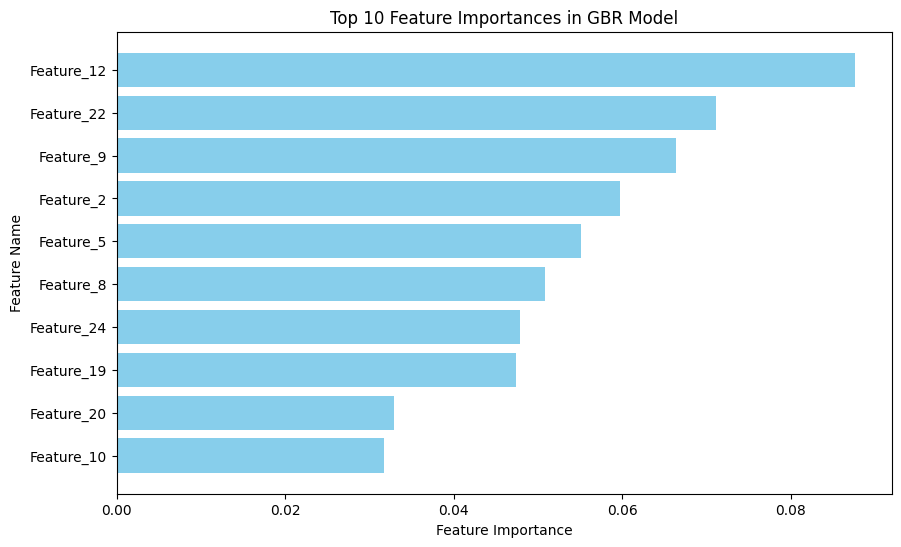

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importance = gbr.feature_importances_
feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]  # Get feature names from X_train

# Create DataFrame with feature index, name, and importance
importance_df = pd.DataFrame({
    'Feature Number': range(len(feature_names)),  # Feature index
    'Feature Name': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features with numbers
print("Top 10 Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature Name'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importances in GBR Model")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

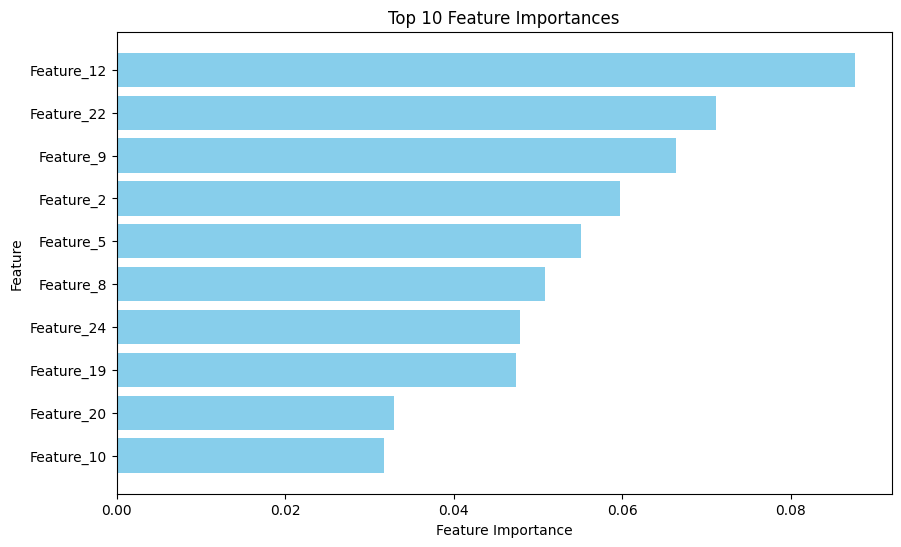

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importance = gbr.feature_importances_

# Assuming feature_names were defined earlier (e.g., in your data preprocessing steps)
# If not, define them based on the original columns of your DataFrame before scaling
# For example:
feature_names = df_mvi.drop("SalePrice", axis=1).columns.tolist()  # Replace 'df_encod' with your original DataFrame
print(feature_names)

feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Show top 10 features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


Top 10 Features by Permutation Importance:
       Feature   Importance
2    Feature_2  6422.125643
12  Feature_12  5158.461634
8    Feature_8  5057.865413
22  Feature_22  3876.103310
5    Feature_5  3571.876929
9    Feature_9  3163.312956
3    Feature_3  2531.967632
19  Feature_19  2034.227506
24  Feature_24  2004.089936
20  Feature_20  1964.201825


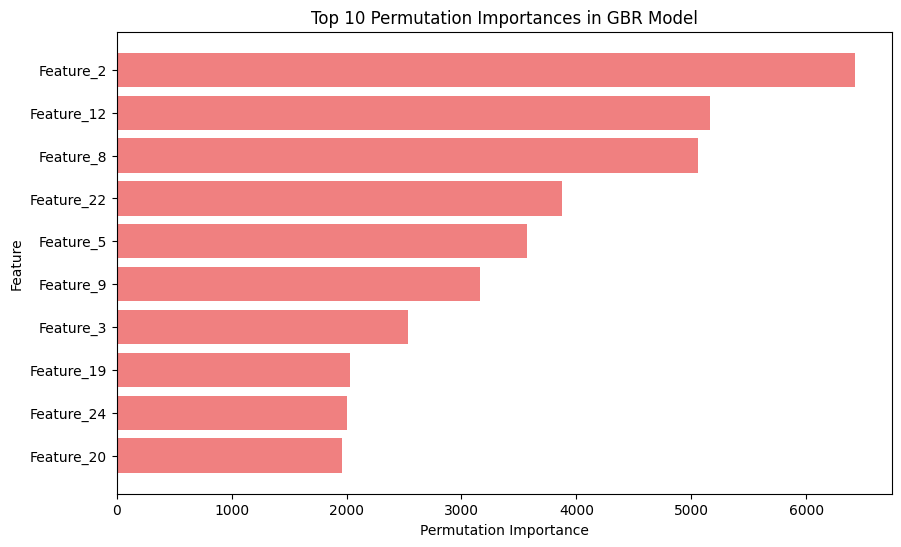

In [130]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(gbr, X_train, y_train, scoring='neg_mean_absolute_error', n_repeats=10, random_state=42)

# Assuming 'feature_names' was defined earlier in your code to hold the original column names
# If not, you need to define it before running this cell.
# For example: feature_names = df_encod.drop("SalePrice", axis=1).columns.tolist()
# Where 'df_encod' is the DataFrame you used before scaling.

# Create a DataFrame with feature names from 'feature_names'
perm_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Sort and display top features
perm_df = perm_df.sort_values(by='Importance', ascending=False)
print("Top 10 Features by Permutation Importance:")
print(perm_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'][:10], perm_df['Importance'][:10], color='lightcoral')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Permutation Importances in GBR Model")
plt.gca().invert_yaxis()
plt.show()


## Model Training

In [96]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='log2',
                          min_samples_leaf=2, min_samples_split=20,
                          n_estimators=700, random_state=42, subsample=0.9)

In [97]:
y_pred=gbr.predict(X_test)

In [98]:
# y_pred # is a numpy array hence we gonna convert it into dataframe
y_pred=pd.concat([df_test['Id'],pd.DataFrame(y_pred,columns=['SalePrice'])],axis=1)
y_pred


,Id,SalePrice
0,1461,132698.023327
1,1462,159110.137031
2,1463,191886.463266
3,1464,192356.414983
4,1465,184624.713877
5,1466,175965.201720
6,1467,175091.036070
7,1468,173720.999468
8,1469,180257.833935
9,1470,140164.566797


In [99]:
y_pred.to_csv("D:\SlashMark Internship\House Price Prediction\ML_Model\data_set\submission.csv",index=False)

In [100]:
#storing model in pickle file
import pickle

with open('gbr.pkl','wb') as f:
    pickle.dump(gbr,f)

In [101]:
# prompt: i want to go onto set up an ai that is able to accuratle predict housing prices. So far i have done a lot of data preprocessing, what is next?

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Example using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Choose your model and hyperparameters
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"MSE: {mse}")
print(f"R2: {r2}")

# After selecting and tuning the best model, train it on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Prepare submission file
submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
submission_df.to_csv('submission.csv', index=False)

MSE: 881916610.3583815
R2: 0.8850222811212355


In [102]:
print(X_train)
feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]
print(feature_names)

[[-0.00226914 -0.21215281 -0.79515147 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.50189489 -0.26857781 -0.07183611 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.13853071 -0.1743691  -0.79515147 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [-0.45647437 -0.23500343 -0.79515147 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.68357699 -0.28812111  0.65147924 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.77441804 -0.68479991  0.65147924 ... -0.11785113  0.4676514
  -0.30599503]]
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feat

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 8 features
print(feature_importance_df.head(100))

         Feature  Importance
2      Feature_2    0.566344
12    Feature_12    0.123182
8      Feature_8    0.038393
10    Feature_10    0.036231
5      Feature_5    0.033055
9      Feature_9    0.028076
22    Feature_22    0.020017
1      Feature_1    0.019204
21    Feature_21    0.015542
24    Feature_24    0.009822
0      Feature_0    0.008897
19    Feature_19    0.008209
15    Feature_15    0.007091
23    Feature_23    0.006607
7      Feature_7    0.006556
138  Feature_138    0.004976
4      Feature_4    0.004887
3      Feature_3    0.004736
27    Feature_27    0.003813
20    Feature_20    0.003387
146  Feature_146    0.002345
38    Feature_38    0.002276
17    Feature_17    0.002040
142  Feature_142    0.001881
131  Feature_131    0.001875
157  Feature_157    0.001615
33    Feature_33    0.001514
13    Feature_13    0.001358
18    Feature_18    0.001290
6      Feature_6    0.001265
54    Feature_54    0.001253
16    Feature_16    0.001246
28    Feature_28    0.001137
164  Feature_1

In [104]:
# Assuming you have your trained model (e.g., 'model') and the scaler used for preprocessing (e.g., 'sc')

def predict_house_price(model, sc, GrLivArea, LotArea, OverallQual, OverallCond, YearBuilt, TotalBsmtSF):
  """
  Predicts the price of an imaginary house based on provided parameters.

  Args:
    model: The trained regression model.
    sc: The StandardScaler used for feature scaling.
    GrLivArea: Above grade (ground) living area square feet.
    LotArea: Lot size in square feet.
    OverallQual: Rates the overall material and finish of the house.
    OverallCond: Rates the overall condition of the house.
    YearBuilt: Original construction date.
    TotalBsmtSF: Total square feet of basement area.

  Returns:
    The predicted price of the house.
  """

  # Create a DataFrame with the input parameters
  new_house_data = pd.DataFrame({
      'GrLivArea': [GrLivArea],
      'LotArea': [LotArea],
      'OverallQual': [OverallQual],
      'OverallCond': [OverallCond],
      'YearBuilt': [YearBuilt],
      'TotalBsmtSF': [TotalBsmtSF],
      # Add other relevant features here if needed and set them to appropriate values
      # You may need to ensure the columns exist and have dummy variables added based on your training data
      # For features with missing values, use your imputation strategy
  })

  # Instead of using feature_names_in_, use X_train.columns to get feature names
  training_features = feature_names # Assuming X_train is your training dataframe
  # If you used a pipeline with feature transformations, getting the original feature names
  # will be more complex and may require accessing steps within your pipeline.

  # Ensure all necessary columns are present and in the correct order
  missing_cols = [col for col in training_features if col not in new_house_data.columns]
  for col in missing_cols:
    new_house_data[col] = 0 # Impute with 0 for missing columns

  # Ensure the order of columns matches your training data
  new_house_data = new_house_data[training_features]

  # Scale the input data using the same scaler used for training
  new_house_data_scaled = sc.transform(new_house_data)

  # Make the prediction using the model
  predicted_price = model.predict(new_house_data_scaled)[0]

  return predicted_price

# Example usage (replace with your actual values)
GrLivArea = 1500
LotArea = 10000
OverallQual = 7
OverallCond = 5
YearBuilt = 2000
TotalBsmtSF = 1000

# Provide values for all other features your model expects
other_features = {
    '1stFlrSF': 1200,  # Example value
    '2ndFlrSF': 800,   # Example value
    '3SsnPorch': 0,   # Example value
    'Alley_NA': 1,    # Example value (if using one-hot encoding)
    'Alley_Pave': 0,   # Example value (if using one-hot encoding)
    # ... Add other features with their values ...
}

predicted_price = predict_house_price(model, sc, GrLivArea, LotArea, OverallQual, OverallCond, YearBuilt, TotalBsmtSF)
print(f"Predicted house price: ${predicted_price}")

<ipython-input-104-3654cc61a554>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_house_data[col] = 0 # Impute with 0 for missing columns
<ipython-input-104-3654cc61a554>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_house_data[col] = 0 # Impute with 0 for missing columns
<ipython-input-104-3654cc61a554>:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Feature_0
- Feature_1
- Feature_10
- Feature_100
- Feature_101
- ...
Feature names seen at fit time, yet now missing:
- 1stFlrSF
- 2ndFlrSF
- 3SsnPorch
- Alley_Pave
- BedroomAbvGr
- ...


In [ ]:
print(df_mvi.shape)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.impute import SimpleImputer
# Import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# copy dataset
df_neur=df_mvi.copy()

# set up x and y
x = df_neur.drop("SalePrice", axis=1)
y = df_neur['SalePrice']

x = pd.get_dummies(x)

# create train/test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

# Remove rows with NaN values in y_train and y_test
y_train = y_train.dropna()
y_test = y_test.dropna()

#y_train.shape()

# Instead of using the index to select columns (which won't work with NumPy arrays),
# reset the index of x_train and x_test to match the filtered y_train and y_test
x_train = x_train.loc[y_train.index].reset_index(drop=True)
x_test = x_test.loc[y_test.index].reset_index(drop=True)

# Log transformation on sale price
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# Impute missing x values
#imputer = SimpleImputer(strategy='mean')
#x_train = imputer.fit_transform(x_train)
#x_test = imputer.transform(x_test)

# Scale the features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the neural network
# Build the neural network model
# Move model creation and compilation outside of the training loop
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-4)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True)

model.summary()

# Check for missing values in the input data
print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on the test data
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test MAE: {test_mae:.2f}")

# Make predictions
# y_pred = model.predict(x_test)
y_pred = np.expm1(model.predict(x_test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

test_loss = model.evaluate(x_test, y_test)
print(f'Test Loss (Mean Squared Error): {test_loss}')
print(f'Test Loss (RMSE): {np.sqrt(test_loss)}')
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(r2)

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss and MAE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE Curve')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Assuming pred and y_test are Pandas Series
pred = model.predict(x_test)
y_test = np.array(y_test)  # Convert y_test to NumPy array if it's not already

chart_regression(pred.flatten(), y_test)

In [ ]:
import seaborn as sns

sns.boxplot(y=y_train)